In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
episode_file = open("../data/hit_approvals/task_4.json")
data = json.loads(episode_file.read())

print("Number of episodes {}".format(len(data["episodes"])))
for episode in data["episodes"]:
    print("Episode id: {}, Total actions: {}".format(episode["episode_id"], len(episode["reference_replay"])))

Number of episodes 13
Episode id: A1CEBF7WRZ74YK:3P1L2B7AD20SXJFTLKQJH7XQZ6ULOP, Total actions: 2730
Episode id: A17VH9XUILV3E8:36PW28KO407PP9B0UFYX3HN11SNEAU, Total actions: 328
Episode id: A1CEBF7WRZ74YK:3K2755HG5TEFTUE89095B0G7YW1FDH, Total actions: 721
Episode id: A255CGE69I8OTY:35GMH2SV3FSERD514Y3F4C76Q9GEOI, Total actions: 1733
Episode id: A17VH9XUILV3E8:31LM9EDVOM34K8RHHKETM3KT57KJN6, Total actions: 386
Episode id: A1CEBF7WRZ74YK:336KAV9KYR3YQBXNH1HC42WJ7GQ2YG, Total actions: 2319
Episode id: A17VH9XUILV3E8:3JC6VJ2SACUPTQI7JE5UZNHOOZJA5K, Total actions: 459
Episode id: A1CEBF7WRZ74YK:33FBRBDW6PAW9NY71Q8OH2H3QS0C8L, Total actions: 2670
Episode id: A18DHAF7M2IS86:3HUTX6F6VVYMWXTLBE8E2BYHT6R2O5, Total actions: 1521
Episode id: A1CEBF7WRZ74YK:37QW5D2ZRHXCG4N3YCYOW7LLCVJ8S8, Total actions: 756
Episode id: A1CEBF7WRZ74YK:3JW0YLFXRURGDM0UGKOV7CRS0FXWW5, Total actions: 1605
Episode id: A17VH9XUILV3E8:3X0H8UUIT2ZN65JLWFEUANO7U2LWSA, Total actions: 2036
Episode id: A17VH9XUILV3E8:3QUO65DN

In [38]:
episode_data = []
columns = []
columns.append("episode_id")
columns.append("total_actions")

for episode in data["episodes"]:
    entry = {}
    entry["episode_id"] = episode["episode_id"]
    entry["total_actions"] = len(episode["reference_replay"])


    for replay_data in episode["reference_replay"]:
        action = replay_data["action"]
        if not action in entry:
            entry[action] = 0
        entry[action] += 1

        if action not in columns:
            columns.append(action)
    episode_data.append(entry)

In [39]:
df = pd.DataFrame(episode_data, columns=columns)
df.fillna(0, inplace=True)
df.head(15)

,episode_id,total_actions,stepPhysics,lookDown,lookUp,moveForward,turnLeft,turnRight,grabReleaseObject,moveBackward
0,A1CEBF7WRZ74YK:3P1L2B7AD20SXJFTLKQJH7XQZ6ULOP,2730,2436,26,16.0,69,77,83,3,20.0
1,A17VH9XUILV3E8:36PW28KO407PP9B0UFYX3HN11SNEAU,328,222,6,0.0,45,17,18,2,18.0
2,A1CEBF7WRZ74YK:3K2755HG5TEFTUE89095B0G7YW1FDH,721,518,14,13.0,66,43,40,2,25.0
3,A255CGE69I8OTY:35GMH2SV3FSERD514Y3F4C76Q9GEOI,1733,1224,16,9.0,181,167,132,4,0.0
4,A17VH9XUILV3E8:31LM9EDVOM34K8RHHKETM3KT57KJN6,386,291,7,0.0,34,25,14,2,13.0
5,A1CEBF7WRZ74YK:336KAV9KYR3YQBXNH1HC42WJ7GQ2YG,2319,1820,39,32.0,132,160,125,6,5.0
6,A17VH9XUILV3E8:3JC6VJ2SACUPTQI7JE5UZNHOOZJA5K,459,347,9,3.0,46,7,34,2,11.0
7,A1CEBF7WRZ74YK:33FBRBDW6PAW9NY71Q8OH2H3QS0C8L,2670,2438,24,16.0,39,92,47,14,0.0
8,A18DHAF7M2IS86:3HUTX6F6VVYMWXTLBE8E2BYHT6R2O5,1521,940,17,11.0,257,163,125,2,6.0
9,A1CEBF7WRZ74YK:37QW5D2ZRHXCG4N3YCYOW7LLCVJ8S8,756,617,12,7.0,44,4,70,2,0.0


In [40]:
df["agent_actions"] = df["total_actions"] - df["stepPhysics"]

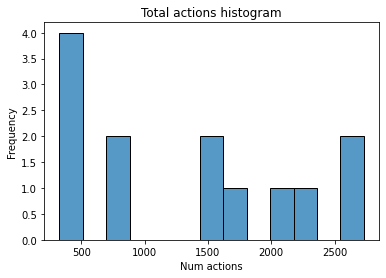

In [80]:
sns.histplot(df["total_actions"].values, bins=13)
plt.gca().set(title='Total actions histogram', ylabel='Frequency', xlabel='Num actions')
plt.savefig("action_distribution.jpg")

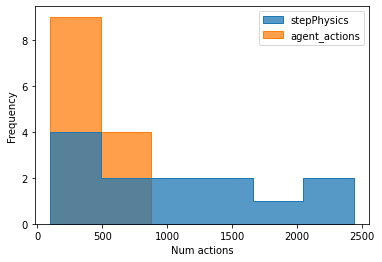

In [81]:
sns.histplot(data=df[["stepPhysics", "agent_actions"]], element="step")
plt.gca().set(ylabel='Frequency', xlabel='Num actions')
plt.savefig("env_and_agent_action_distribution.jpg")

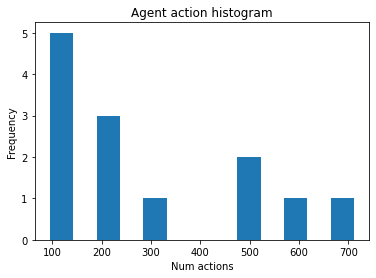

In [82]:
plt.hist(df["agent_actions"].values, bins=13)
plt.gca().set(title='Agent action histogram', ylabel='Frequency', xlabel='Num actions')
plt.savefig("agent_action_dist.jpg")

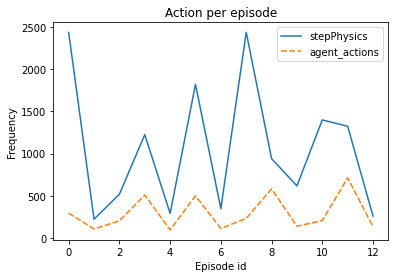

In [83]:
sns.lineplot(data=df[["stepPhysics", "agent_actions"]])
plt.gca().set(title='Action per episode', ylabel='Frequency', xlabel='Episode id')
plt.savefig("action_per_episode.jpg")

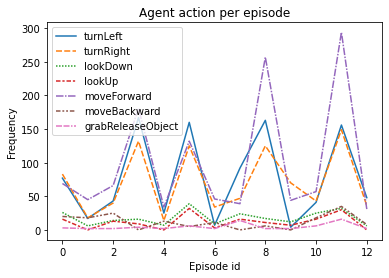

In [85]:
sns.lineplot(data=df[["turnLeft", "turnRight", "lookDown", "lookUp", "moveForward", "moveBackward", "grabReleaseObject"]])
plt.gca().set(title='Agent action per episode', ylabel='Frequency', xlabel='Episode id')
plt.savefig("agent_action_per_episode.jpg")